In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from astropy import units as u
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    ExpCutoffPowerLawSpectralModel,
    LogParabolaSpectralModel,
    SkyModel,
)
from gammapy.estimators import FluxPoints
from gammapy.datasets import FluxPointsDataset, Datasets
from gammapy.catalog import CATALOG_REGISTRY
from gammapy.modeling import Fit

In [3]:
filename = '$GAMMAPY_DATA/hawc_crab/HAWC19_flux_points.fits'
flux_points = FluxPoints.read(filename)

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


In [4]:
pwl = PowerLawSpectralModel(
    index=2, amplitude="1e-12 cm-2 s-1 TeV-1", reference="1 TeV"
)
model = SkyModel(spectral_model=pwl, name="crab")

In [5]:
dataset1 = FluxPointsDataset(data=flux_points)
dataset1.models = model

In [6]:
fit = Fit()

In [7]:
%%time
result1 = fit.run(datasets=[dataset1])

CPU times: user 127 ms, sys: 4.02 ms, total: 131 ms
Wall time: 128 ms


In [8]:
dataset1.models.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,2.6988e+00,,1.069e-02,nan,nan,False,False,
spectral,amplitude,4.2377e-11,cm-2 s-1 TeV-1,7.289e-13,nan,nan,False,True,
spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,


<AxesSubplot:xlabel='Energy [TeV]', ylabel='dnde [1 / (cm2 s TeV)]'>

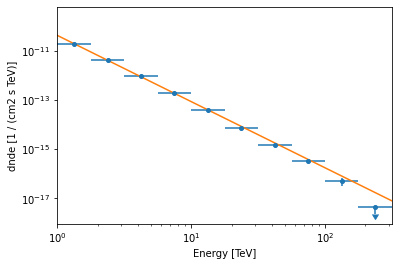

In [9]:
energy_bounds = [5e-1, 5e2] * u.TeV
ax = flux_points.plot()
model.spectral_model.plot(ax=ax, energy_bounds=energy_bounds)

## Now, split into multiple fp

In [10]:
t1 = flux_points.to_table()
fp1=flux_points.from_table(t1[0:3])
fp2=flux_points.from_table(t1[3:6])
fp3=flux_points.from_table(t1[6:])
dataset_a = FluxPointsDataset(data=fp1)
dataset_b = FluxPointsDataset(data=fp2)
dataset_c = FluxPointsDataset(data=fp3)

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


In [11]:
pwl = PowerLawSpectralModel(
    index=2, amplitude="1e-12 cm-2 s-1 TeV-1", reference="1 TeV"
)
model2 = SkyModel(spectral_model=pwl, name="crab")

In [12]:
datasets2 = Datasets([dataset_a, dataset_b, dataset_c])
datasets2.models = model2

In [13]:
%%time
result2 = fit.run(datasets=datasets2)

CPU times: user 262 ms, sys: 3.44 ms, total: 266 ms
Wall time: 264 ms


In [14]:
datasets2.models.to_parameters_table()

model,type,name,value,unit,error,min,max,frozen,is_norm,link
str4,str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
crab,spectral,index,2.6988e+00,,1.069e-02,nan,nan,False,False,
crab,spectral,amplitude,4.2377e-11,cm-2 s-1 TeV-1,7.289e-13,nan,nan,False,True,
crab,spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,


No handles with labels found to put in legend.


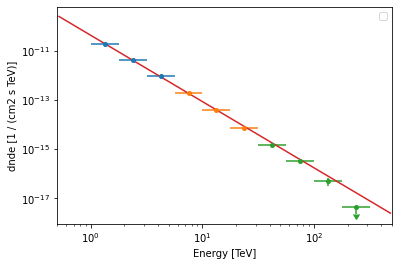

In [15]:
energy_bounds = [5e-1, 5e2] * u.TeV
ax = plt.subplot()
kwargs = {"ax": ax, "sed_type": "dnde"}
for d in datasets2:
    d.data.plot(**kwargs)
model2.spectral_model.plot(ax=ax, energy_bounds=energy_bounds)
ax.set_xlim(energy_bounds)
ax.legend()